# taq_data_to_array

#### Juan Camilo Henao Londono - 26.03.2019
#### AG Guhr - Universitaet Duisburg-Essen

In [1]:
# Modules

import numpy as np
import os

import pickle
import dask.dataframe as dd

import taq_data_tools
import taq_data_analysis

from matplotlib import pyplot as plt

__tau__ = 1000

In [2]:
def taq_data_to_array(ticker, quotes, trades, year, month, day):
    """
    Convert the pandas dataframe information of a month in numpy arrays of a
    day to be used later in the analysis
        :param ticker: string of the abbreviation of the stock to be analized
                       (i.e. 'AAPL')
        :param quotes: pandas dataframe with the quotes information
        :param trades: pandas dataframe with the trades information
        :param year: string of the year to be analized (i.e '2008')
        :param month: string of the month to be analized (i.e '07')
        :param day: string of the day to be analized (i.e '07')
    """
    function_name = taq_data_to_array.__name__
    taq_data_tools.taq_function_header_print_data(function_name, ticker,
                                                  ticker, year, month, day)

    data_q = quotes.loc[year + '-' + month + '-' + day].copy()
    data_t = trades.loc[year + '-' + month + '-' + day].copy()

    data_q.loc[:, 'Time'] = data_q['Time'].apply(taq_data_tools.get_sec)
    data_t.loc[:, 'Time'] = data_t['Time'].apply(taq_data_tools.get_sec)

    data_q = data_q.loc[(data_q['Time'] >= 34800)
                        & (data_q['Time'] < 57000)]
    data_t = data_t.loc[(data_t['Time'] >= 34800)
                        & (data_t['Time'] < 57000)]

    time_q = np.array(data_q['Time'])
    bid_q = np.array(data_q['Bid'])
    ask_q = np.array(data_q['Ask'])

    time_t = np.array(data_t['Time'])
    ask_t = np.array(data_t['Ask'])
    time_t, ask_t = zip(*sorted(zip(time_t, ask_t)))
    time_t = np.asarray(time_t)
    ask_t = np.asarray(ask_t)

    if (not os.path.isdir('../../TAQ_{}/TAQ_py/'.format(year))):

        try:

            os.mkdir('../../TAQ_{}/TAQ_py/'.format(year))
            print('Folder to save data created')

        except FileExistsError:

            print('Folder exists. The folder was not created')

    pickle.dump((time_q, bid_q, ask_q),
                open('../../TAQ_{1}/TAQ_py/TAQ_{0}_quotes_{1}{2}{3}.pickle'
                     .format(ticker, year, month, day), 'wb'))

    pickle.dump((time_t, ask_t),
                open('../../TAQ_{1}/TAQ_py/TAQ_{0}_trades_{1}{2}{3}.pickle'
                     .format(ticker, year, month, day), 'wb'))

    print('Data Saved')
    print()

    return (time_q, bid_q, ask_q, time_t, ask_t)

In [3]:
ticker = 'AAPL'
year = '2008'
month = '01'
day = '02'
quotes, trades = taq_data_analysis.taq_data_extract(ticker, year, month)
time_q, bid_q, ask_q, time_t, ask_t = taq_data_to_array(ticker, quotes, trades, year, month, day)

TAQ data
taq_data_extract
Processing data for the stock AAPL the 2008.01.-
TAQ data
taq_data_to_array
Processing data for the stock AAPL the 2008.01.02
Data Saved



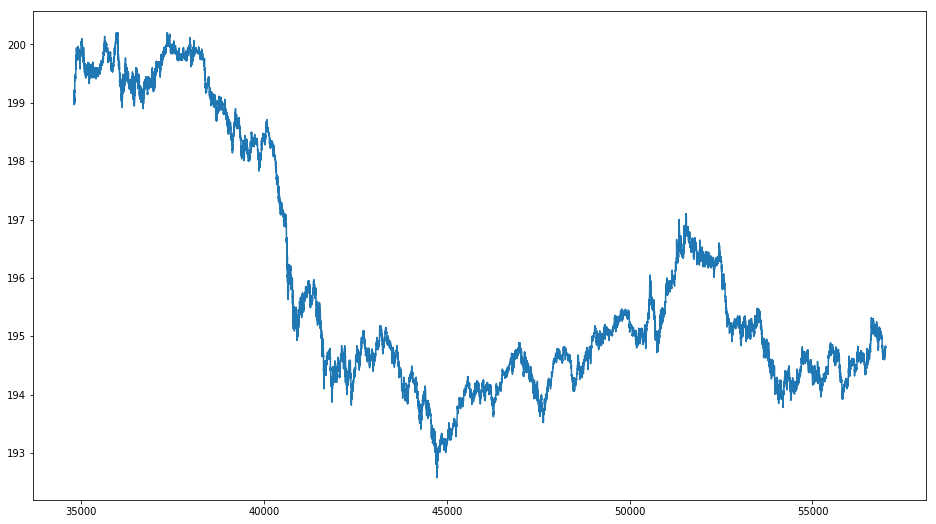

In [4]:
fig = plt.figure(figsize=(16,9))
plt.plot(time_q, ask_q)